In [1]:
import pickle
with open("./road_accident.pkl", 'rb') as f:
    road_df = pickle.load(f)

In [4]:
url = 'http://tmacs.kotsa.or.kr/web/TG/TG200/TG2100S/Tgsearch01_AJAX.jsp'

In [30]:
year = [2018, 2019, 2020, 2021, 2022]

In [31]:
jijace_list = [11680, 11740, 11305, 11500, 11620, 11215, 11530, 11545, 11350, 11320, 11230, 11590, 11440, 11410, 11650, 11200, 11290, 11710, 11470, 11560, 11170, 11380, 11110, 11140, 11260]

In [70]:
payload = {"gubun": "S1190",
"mid": "S1190",
"sYear": "2018",
"eYear": "2018",
"sido": "11000",
"jijace": "11320",
"kind1": "s102",
"kind2": "s1021",
"cartype": "07",}

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [32]:
from tqdm import tqdm
import requests
cycle_df = []

for y in year:    
    payload['sYear'] = y
    payload['eYear'] = y
    for x in tqdm(jijace_list):
        payload['jijace'] = x
        df = pd.DataFrame(requests.post(url, data=payload).json())
        df['YEAR'] = y        
        cycle_df.append(df)
        

100%|██████████| 25/25 [00:14<00:00,  1.70it/s]


In [33]:
cycle_df_concat = pd.concat(cycle_df)

In [34]:
cycle_df_concat['BASE_CATEGORY'] = '도로형태'

In [72]:
cycle_df_concat.head(3)

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,BASE_NAME,BIG_CNT,PSGT_CNT,WND_ACC,ACC_CNT,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,1,11000,03,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,03,0,0,2018,도로형태
1,강남구,0.0,2,11000,06,0,1,서울,A,11680,교차로안,0,0,1,2,0,0,01,1,0,06,1,0,2018,도로형태
2,강남구,0.0,1,11000,07,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,07,0,0,2018,도로형태


In [74]:
cycle_df_concat.YEAR.value_counts()

YEAR
2019    796
2021    790
2020    785
2022    772
2018    751
Name: count, dtype: int64

In [41]:
cycle_df_concat.ACC_CNT.sum()

8492

In [36]:
cycle_df_concat.rename(columns={"GUBUN_NM" : "MONTH"}, inplace=True)

In [111]:
cycle_df_concat

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,BASE_NAME,BIG_CNT,PSGT_CNT,WND_ACC,ACC_CNT,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,1,11000,03,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,03,0,0,2018,도로형태
1,강남구,0.0,2,11000,06,0,1,서울,A,11680,교차로안,0,0,1,2,0,0,01,1,0,06,1,0,2018,도로형태
2,강남구,0.0,1,11000,07,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,07,0,0,2018,도로형태
3,강남구,0.0,1,11000,08,1,0,서울,A,11680,교차로안,0,0,0,1,0,0,01,0,0,08,0,1,2018,도로형태
4,강남구,0.0,1,11000,10,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,10,0,0,2018,도로형태
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,중랑구,0.0,1,11000,08,1,0,서울,A,11260,기타,0,0,0,1,0,0,99,0,0,08,0,1,2022,도로형태
38,중랑구,0.0,2,11000,09,1,1,서울,A,11260,기타,0,0,0,2,0,0,99,0,0,09,1,1,2022,도로형태
39,중랑구,0.0,1,11000,10,1,0,서울,A,11260,기타,0,0,0,1,0,0,99,0,0,10,0,1,2022,도로형태
40,중랑구,0.0,2,11000,11,1,1,서울,A,11260,기타,0,0,0,2,0,0,99,0,0,11,1,1,2022,도로형태


In [110]:
with open('./road_accident_cycle_month', 'wb') as f:
    pickle.dump(cycle_df_concat, f)

In [113]:
with open('./road_accident_cycle_month', 'rb') as f:
    df1 =pd.DataFrame(  pickle.load(f))


In [112]:
del df1

In [104]:
import pymysql
host = '13.125.65.37'
user = 'encore6'
password = 'EnCore6!@#'
db = 'encore6'
con =pymysql.connect(host=host, user=user, password=password, db=db, charset='utf8')
cur = con.cursor()

In [79]:

host = 'localhost'
user = 'gen'
password = 'encore'
db = 'encore'
con =pymysql.connect(host=host, user=user, password=password, db=db, charset='utf8')
cur = con.cursor()

In [80]:
query = """CREATE TABLE road_accident_cycle_month
(
  `JIJACE_NM` VARCHAR(30),
    `CHISA` FLOAT,
    `ACC_HUM` INT,
    `SIDO_CD` INT,
    `MONTH` CHAR(2),
    `SLTWD_CNT` INT,
    `SERI_ACC` INT,
    `SIDO_NM` VARCHAR(10),
    `AC_MODE` VARCHAR(4),
    `CRT_JIJACE_CD` INT ,
    `BASE_NAME` VARCHAR(30),
    `BIG_CNT` INT,
    `PSGT_CNT` INT,
    `WND_ACC` INT,
    `ACC_CNT` INT,
    `TRK_CNT` INT,
    `DEATH_CNT` INT,
    `BASE_CODE` VARCHAR(10),
    `WND_CNT` INT,
    `DEATH_ACC` INT,
    `GUBUN` VARCHAR(5),
    `SERI_CNT` INT,
    `SLTWD_ACC` INT,
    `YEAR` INT,
    `BASE_CATEGORY` VARCHAR(10)
)"""

In [81]:
cur.execute(query)
con.commit()

In [82]:
insert = """INSERT INTO road_accident_cycle_month VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""

In [114]:
df2 = df1.reset_index().drop('index', axis=1)

In [115]:
df2

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,BASE_NAME,BIG_CNT,PSGT_CNT,WND_ACC,ACC_CNT,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,1,11000,03,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,03,0,0,2018,도로형태
1,강남구,0.0,2,11000,06,0,1,서울,A,11680,교차로안,0,0,1,2,0,0,01,1,0,06,1,0,2018,도로형태
2,강남구,0.0,1,11000,07,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,07,0,0,2018,도로형태
3,강남구,0.0,1,11000,08,1,0,서울,A,11680,교차로안,0,0,0,1,0,0,01,0,0,08,0,1,2018,도로형태
4,강남구,0.0,1,11000,10,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,10,0,0,2018,도로형태
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,중랑구,0.0,1,11000,08,1,0,서울,A,11260,기타,0,0,0,1,0,0,99,0,0,08,0,1,2022,도로형태
3890,중랑구,0.0,2,11000,09,1,1,서울,A,11260,기타,0,0,0,2,0,0,99,0,0,09,1,1,2022,도로형태
3891,중랑구,0.0,1,11000,10,1,0,서울,A,11260,기타,0,0,0,1,0,0,99,0,0,10,0,1,2022,도로형태
3892,중랑구,0.0,2,11000,11,1,1,서울,A,11260,기타,0,0,0,2,0,0,99,0,0,11,1,1,2022,도로형태


In [116]:
# for idx, row in df2.iterrows():
#     cur.execute(insert, df2.iloc[idx].tolist())

# con.commit()

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

In [107]:
# 교통사고 자전거  07
# """SELECT * FROM road_accident_cycle_month"""
road_acc = pd.read_sql_query("select * from road_accident_cycle_month", con=con)
road_acc

/tmp/ipykernel_27474/3715818852.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  road_acc = pd.read_sql_query("select * from road_accident_cycle_month", con=con)


,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,MONTH,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,BASE_NAME,BIG_CNT,PSGT_CNT,WND_ACC,ACC_CNT,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.0,1,11000,03,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,03,0,0,2018,도로형태
1,강남구,0.0,2,11000,06,0,1,서울,A,11680,교차로안,0,0,1,2,0,0,01,1,0,06,1,0,2018,도로형태
2,강남구,0.0,1,11000,07,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,07,0,0,2018,도로형태
3,강남구,0.0,1,11000,08,1,0,서울,A,11680,교차로안,0,0,0,1,0,0,01,0,0,08,0,1,2018,도로형태
4,강남구,0.0,1,11000,10,0,0,서울,A,11680,교차로안,0,0,1,1,0,0,01,1,0,10,0,0,2018,도로형태
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,중랑구,0.0,1,11000,08,1,0,서울,A,11260,기타,0,0,0,1,0,0,99,0,0,08,0,1,2022,도로형태
3890,중랑구,0.0,2,11000,09,1,1,서울,A,11260,기타,0,0,0,2,0,0,99,0,0,09,1,1,2022,도로형태
3891,중랑구,0.0,1,11000,10,1,0,서울,A,11260,기타,0,0,0,1,0,0,99,0,0,10,0,1,2022,도로형태
3892,중랑구,0.0,2,11000,11,1,1,서울,A,11260,기타,0,0,0,2,0,0,99,0,0,11,1,1,2022,도로형태


In [123]:
month = sorted( road_acc['MONTH'].unique())

In [124]:
month

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [127]:
road_acc.YEAR.value_counts()

YEAR
2019    796
2021    790
2020    785
2022    772
2018    751
Name: count, dtype: int64

In [157]:
road_acc2 = road_acc.groupby(['YEAR','MONTH','JIJACE_NM'], as_index=False)['ACC_CNT'].sum()

In [221]:
road_acc2.JIJACE_NM.value_counts()

JIJACE_NM
강서구     60
동대문구    60
노원구     60
송파구     60
영등포구    60
중랑구     60
구로구     59
강남구     59
강동구     59
양천구     59
성동구     59
성북구     58
서초구     58
금천구     58
동작구     58
광진구     57
서대문구    57
은평구     57
도봉구     56
마포구     55
관악구     54
강북구     54
종로구     51
중구      47
용산구     45
Name: count, dtype: int64

In [222]:
# #jijace_acc_cnt =
# # Y2018 =
# # ~road_acc2.YEAR == '2018'
# # road_acc2[road_acc2.YEAR.str.strip() == '2018']
# # road_acc[road_acc['YEAR'] == '2018']
# # y2018 = []
# for idx, row in road_acc.iterrows():
#     # print(f"idx : {idx}")
#     # y2018.append(road_acc['YEAR'][idx])
#     road_acc['YEAR'][idx] = y2018[idx]
#     # print(f"\'{road_acc['YEAR'][idx]}\'")
#     # print(f"road_acc[idx]: {road_acc['YEAR'][idx]}")
#     # print(f"row : {row}")
len(road_acc2)

1420

In [ ]:
a = road_acc2['MONTH']

In [237]:
# 조건에 해당하는 년도 찾기
y2018 = road_acc2[road_acc2['YEAR'] == 2018]
road_years = []
y2019, y2020, y2021, y2022 = []

for x in range(2018,2023):
    for idx in range(len(road_acc2)):
        if road_acc2.iloc[idx]['YEAR'] == 2019:
            print(road_acc2.iloc[idx]['YEAR'])
        # for y in road_acc2['YEAR'] == x:
        # break
    # break

2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019


In [313]:
# road_acc2.ACC_CNT.value_counts()


In [ ]:
import seaborn as sns
sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="DEATH_CNT", data=violation_accident)

In [314]:
gu = ['gangnamgu', 'gangdonggu', 'gangbookgu', 'gangseogu', 'gwanakgu', 'gwangjingu', 'gurogu', 'geumcheongu', 'nowongu', 'dobonggu', 'dongdaemoongu', 'dongjakgu', 'mapogu', 'seodaemoongu', 'seochogu', 'seongdonggu', 'seongbookgu', 'songpagu', 'yanchoengu', 'youngdungpogu', 'yongsangu', 'eunpyunggu', 'jongrogu', 'junggu', 'jungranggu']

<AxesSubplot:xlabel='BASE_NAME', ylabel='ACC_CNT'>

/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.loc

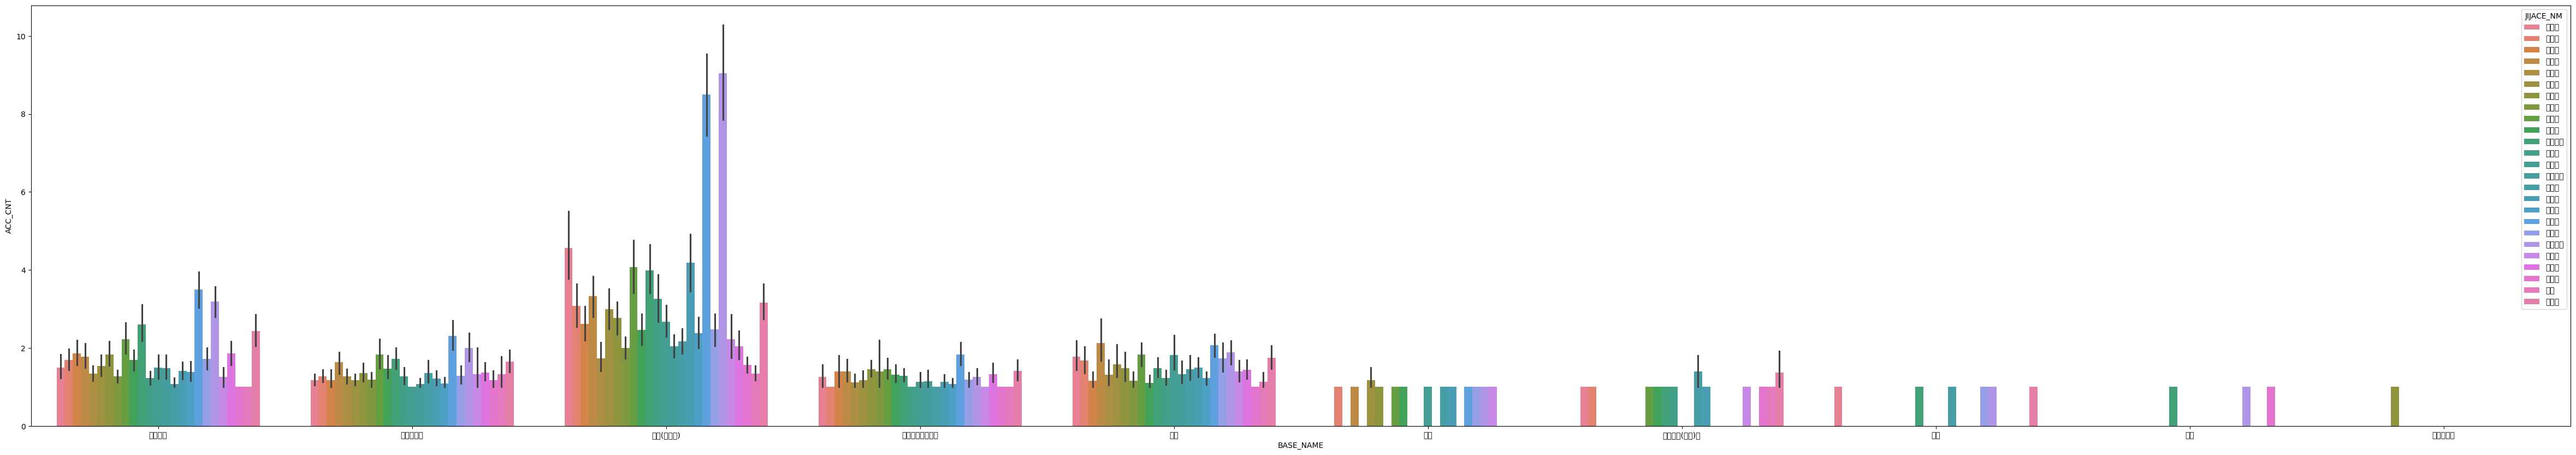

In [316]:
plt.figure(figsize=(60,10))
sns.barplot(x="BASE_NAME", y="ACC_CNT", hue="JIJACE_NM", data=road_acc)

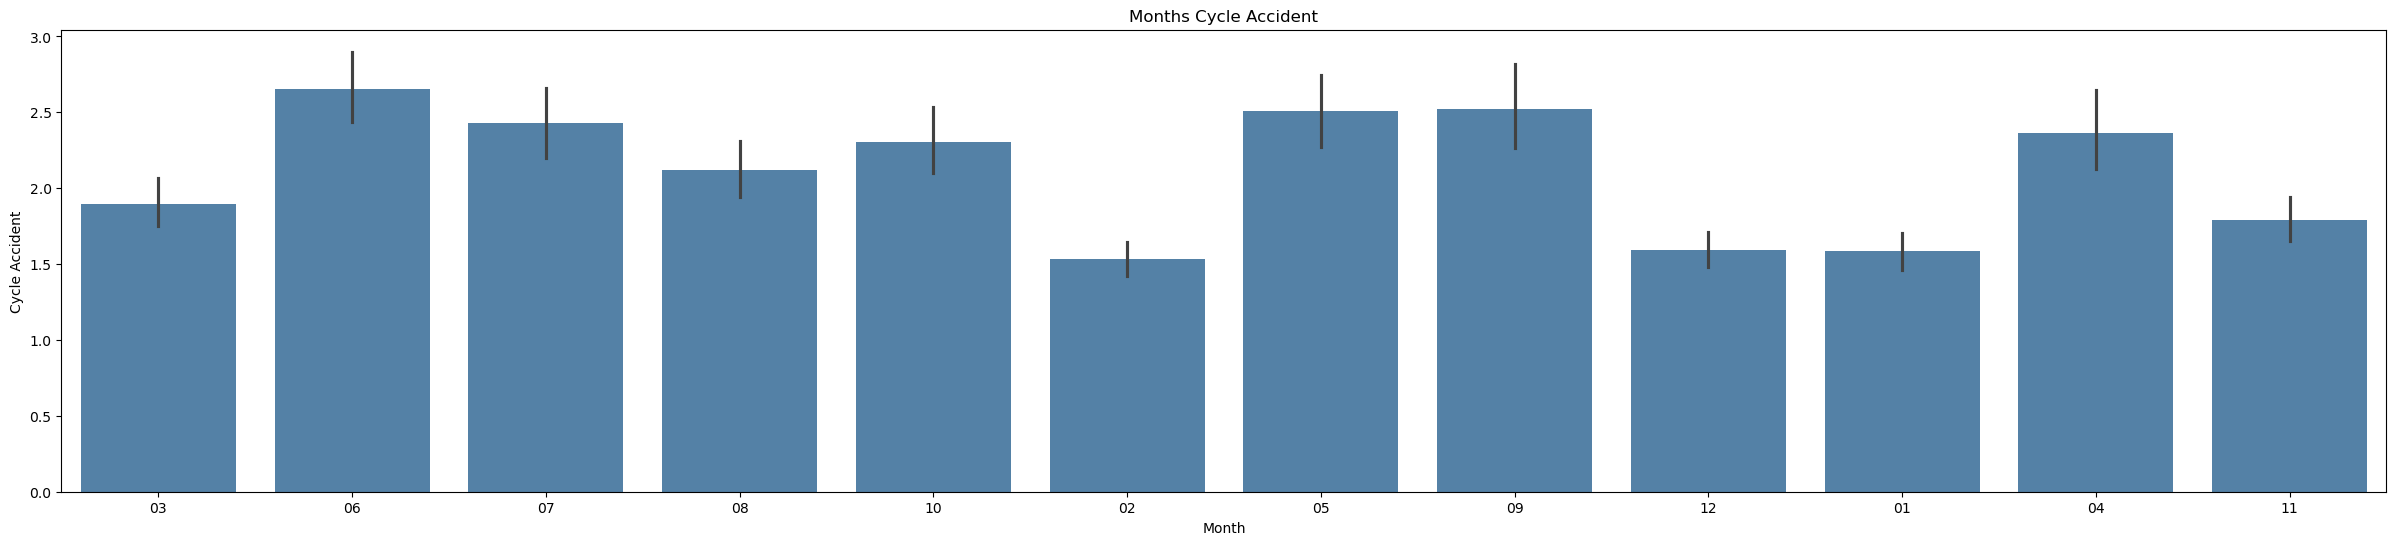

In [317]:
import seaborn as sns
plt.figure(figsize=(30,6))
sns.barplot(x=road_acc['MONTH'], y=road_acc['ACC_CNT'], color='steelblue')
plt.title('Months Cycle Accident')
plt.xlabel('Month')
plt.ylabel('Cycle Accident')
plt.show()

In [134]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [292]:
ym = f"{road_acc2.YEAR[0]}{road_acc2.MONTH[0]}"

In [295]:
# ym
ym = []
for x in range(len(road_acc2)):
     ym.append(f"{road_acc2.YEAR[x]}{road_acc2.MONTH[x]}")

In [302]:
road_acc2.drop({'YEAR', 'MONTH'}, axis=1, inplace=True)

In [303]:
road_acc2

,JIJACE_NM,ACC_CNT,Year_Month
0,강남구,1,201801
1,강동구,4,201801
2,강서구,3,201801
3,관악구,3,201801
4,광진구,4,201801
...,...,...,...
1415,양천구,3,202212
1416,영등포구,4,202212
1417,종로구,1,202212
1418,중구,1,202212


In [298]:
road_acc2['Year_Month'] = ym

In [267]:
# road_acc2.groupby('YEAR','MONTH','JIJACE_NM')['ACC_CNT']
a = []
a.append(road_acc2[road_acc2.YEAR == 2018]['ACC_CNT'].sum())
a.append(road_acc2[road_acc2.YEAR == 2019]['ACC_CNT'].sum())
a.append(road_acc2[road_acc2.YEAR == 2020]['ACC_CNT'].sum())
a.append(road_acc2[road_acc2.YEAR == 2021]['ACC_CNT'].sum())
a.append(road_acc2[road_acc2.YEAR == 2022]['ACC_CNT'].sum())

In [276]:
jj = road_acc2.JIJACE_NM.unique()
jj

array(['강남구', '강동구', '강서구', '관악구', '광진구', '구로구', '노원구', '도봉구', '동대문구',
       '동작구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '은평구', '종로구',
       '중랑구', '금천구', '마포구', '양천구', '중구', '강북구', '용산구'], dtype=object)

In [1]:
# plt.plot(year,a)
plt.figure(figsize=(30,10))
# sns.countplot(road_acc2.ACC_CNT, data=month, hue=jj)
sns.barplot(data=road_acc2, x='Year_Month', y='ACC_CNT',  color='steelblue')
plt.title('사고 건수')
plt.xlabel('지자체')
plt.ylabel('자전거 사고 수')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
# import matplotlib.pyplot as plt    #맷플롯립의 pyplot 모듈

# 그래프 사이즈 (가로, 세로)
# plt.figure(figsize=(60,10))

# month = monthly_bikeuse['Rent_Date']
# usage = monthly_bikeuse['monthly_cnt']
 
# #선 그래프를 그린다. x축에는 month, y축에는 usage 표시한다.
# plt.plot(month, usage, color = 'green', marker = 'o', linestyle = 'solid')
 
# #제목을 설정한다.
# plt.title('monthly use') 
 
# #y축에 레이블을 붙인다.
# plt.ylabel('usage')
# plt.xlabel('month')
# plt.savefig('gdp_per_capita.png', dpi = 600)
# plt.show()